In [1]:
from IPython.core.interactiveshell import InteractiveShell  #show all output from a cell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Table of contents
1. [I. dataframe overview](#1)
2. [II. missing values](#2)
3. [III. correlations between features and survival rates](#3)

In [2]:
train=pd.read_csv('../input/titanic/train.csv')

## I. dataframe overview <a name="1"></a>

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
606,607,0,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9000,NaN,S
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.5500,NaN,S


## II. missing values <a name="2"></a>

In [5]:
#check for the total of null values
total = train.isnull().sum().sort_values(ascending = False)
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


## III. correlations between features and survival rates <a name="3"></a>

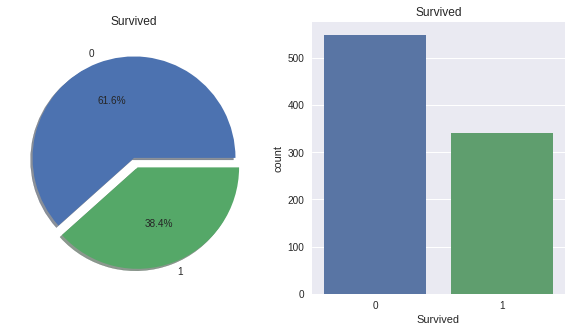

In [6]:
# survived versus casulties
f,ax=plt.subplots(1,2,figsize=(10,5));
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True);
ax[0].set_title('Survived');
ax[0].set_ylabel('');
sns.countplot('Survived',data=train,ax=ax[1]);
ax[1].set_title('Survived');
plt.show();

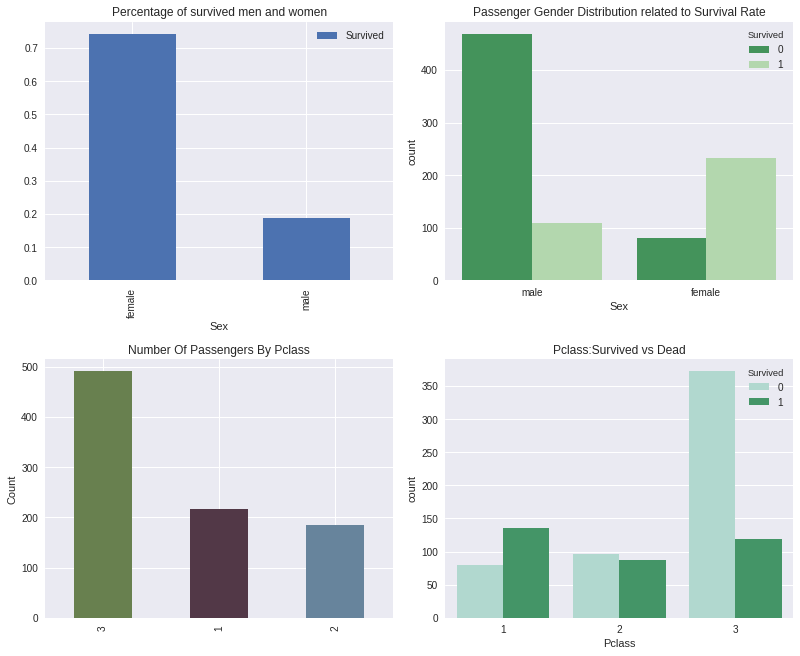

In [7]:
fig,(ax1, ax2) = plt.subplots(nrows = 2,ncols = 2,constrained_layout=True, figsize=(11,9));

# sex
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax1[0]);
ax1[0].set_title('Percentage of survived men and women');
sns.countplot('Sex',hue='Survived',data=train,ax=ax1[1], palette = "Greens_r");
ax1[1].set_title('Passenger Gender Distribution related to Survival Rate');

# passenger class (Pclass)
train['Pclass'].value_counts().plot.bar(color=['#68804f','#523847','#67849c'],ax=ax2[0]);
ax2[0].set_title('Number Of Passengers By Pclass');
ax2[0].set_ylabel('Count');
sns.countplot('Pclass',hue='Survived',data=train,ax=ax2[1], palette = "BuGn");
ax2[1].set_title('Pclass:Survived vs Dead');

plt.show();

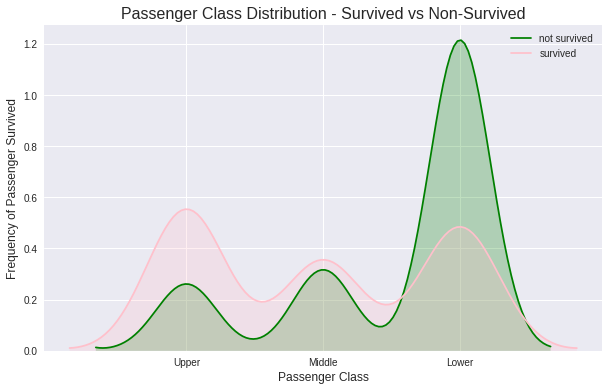

In [8]:
# Kernel Density Plot
fig = plt.figure(figsize=(10,6),)
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='g',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='pink',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 16)
plt.ylabel("Frequency of Passenger Survived", fontsize = 12)
plt.xlabel("Passenger Class", fontsize = 12)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

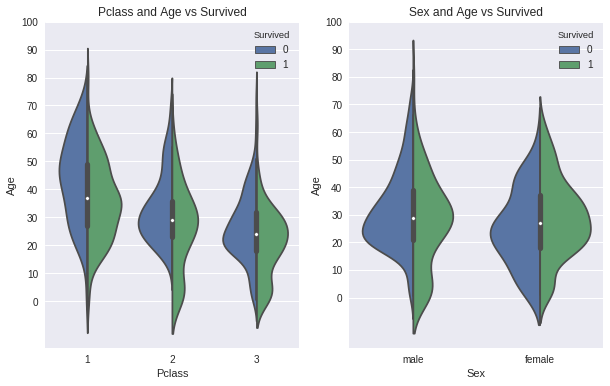

In [9]:
f,ax=plt.subplots(1,2,figsize=(10,6));
sns.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[0]);
ax[0].set_title('Pclass and Age vs Survived');
ax[0].set_yticks(range(0,110,10));
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1]);
ax[1].set_title('Sex and Age vs Survived');
ax[1].set_yticks(range(0,110,10));
plt.show();

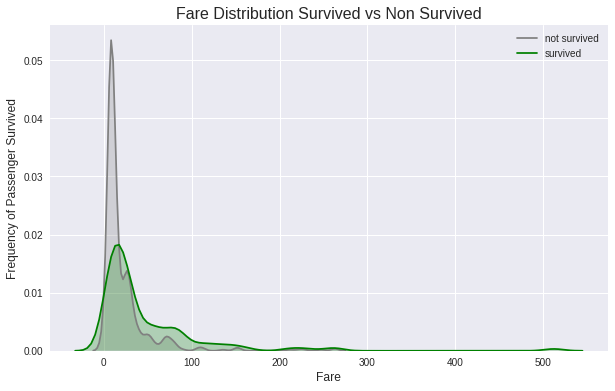

In [10]:
# Kernel Density Plot
fig = plt.figure(figsize=(10,6),);
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived');
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived');
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 16);
plt.ylabel("Frequency of Passenger Survived", fontsize = 12);
plt.xlabel("Fare", fontsize = 12);

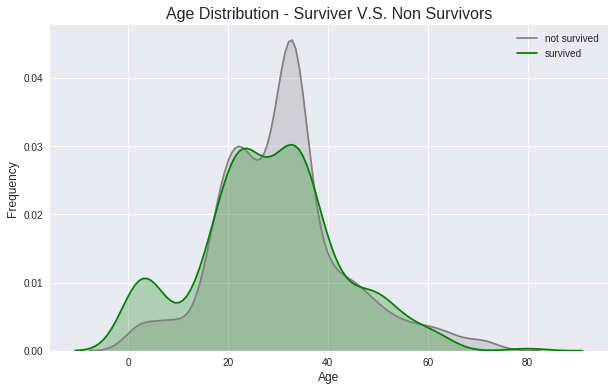

In [11]:
# copies of changes in EDA notebook, i.e. created a new feature 'Initial' with salutations
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.')
    
#restrict the salutations and correct their spellingtr
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='Pastel1_r')

# replace unknown age values 
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

# Kernel Density Plot
fig = plt.figure(figsize=(10,6),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 16)
plt.xlabel("Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


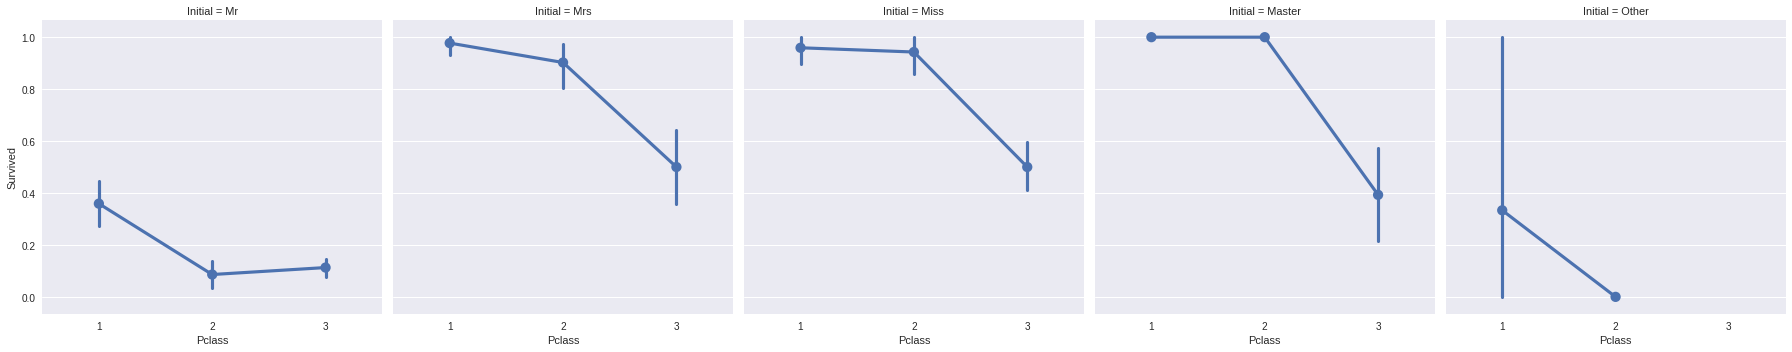

In [12]:
# the women and children first policy applied irrespective of the class

train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.')

#restrict the salutations and correct their spellingtr
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

sns.factorplot('Pclass','Survived',col='Initial',data=train);
plt.show();

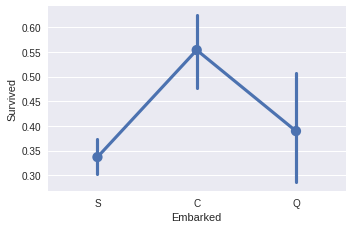

In [13]:
# place of embarkment to survival rate

sns.factorplot('Embarked','Survived',data=train);
fig=plt.gcf();
fig.set_size_inches(5,3);
plt.show();

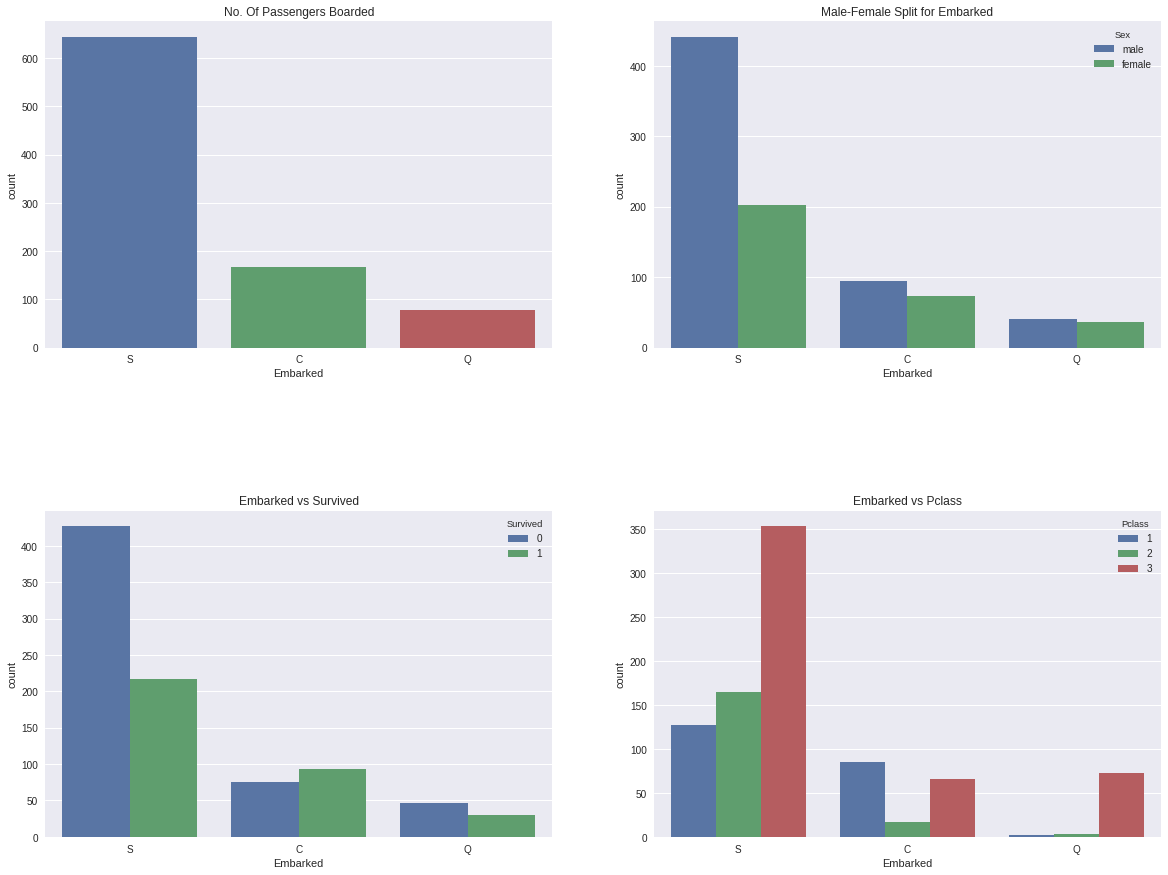

In [14]:
# place of embarkment correcated to other features
f,ax=plt.subplots(2,2,figsize=(20,15));
sns.countplot('Embarked',data=train,ax=ax[0,0]);
ax[0,0].set_title('No. Of Passengers Boarded');
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1]);
ax[0,1].set_title('Male-Female Split for Embarked');
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0]);
ax[1,0].set_title('Embarked vs Survived');
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1]);
ax[1,1].set_title('Embarked vs Pclass');
plt.subplots_adjust(wspace=0.2,hspace=0.5);
plt.show();

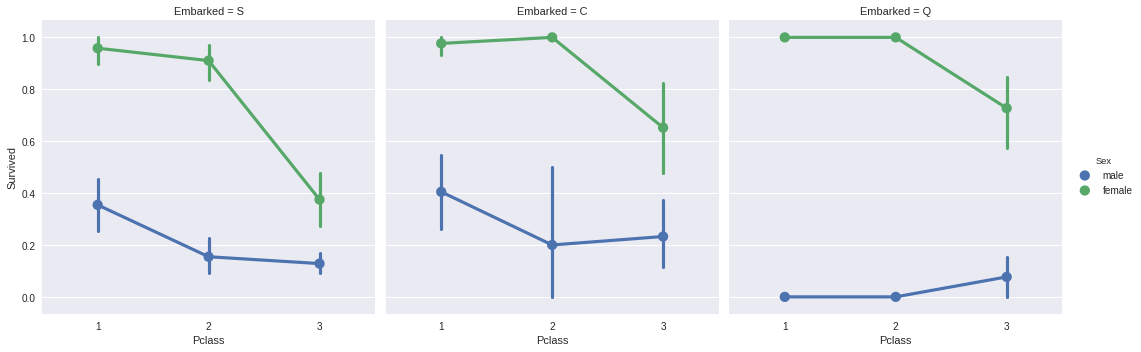

In [15]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train);
plt.show();

In [16]:
# fill NaN
train['Embarked'].fillna('S',inplace=True);

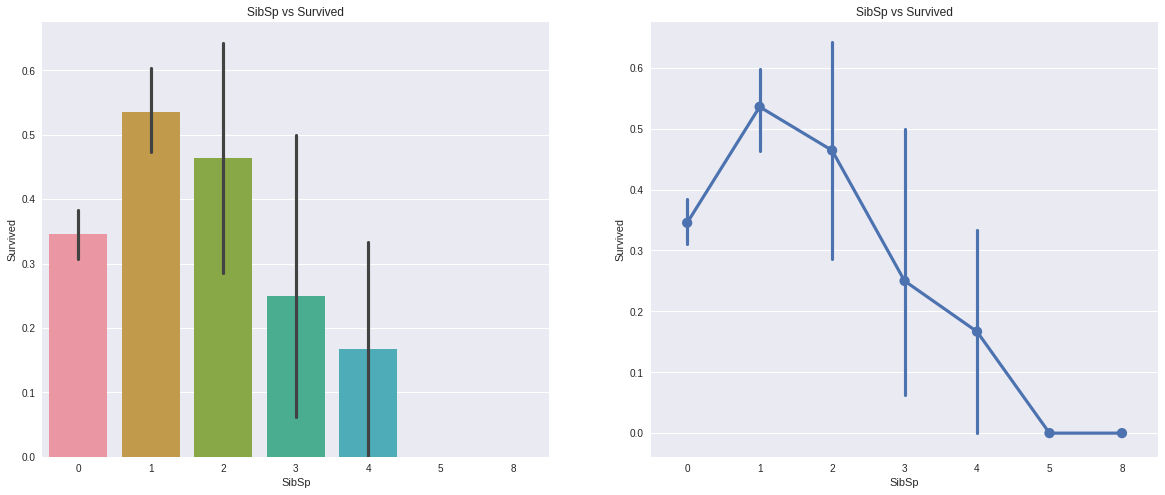

In [17]:
# siblings correlated to survival rate
f,ax=plt.subplots(1,2,figsize=(20,8));
sns.barplot('SibSp','Survived',data=train,ax=ax[0]);
ax[0].set_title('SibSp vs Survived');
sns.factorplot('SibSp','Survived',data=train,ax=ax[1]);
ax[1].set_title('SibSp vs Survived');
plt.close(2);
plt.show();

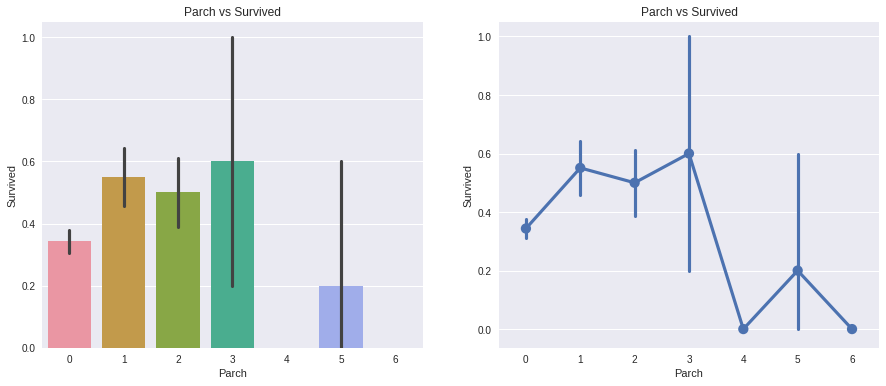

In [18]:
# parents and children correlated to survival rate
f,ax=plt.subplots(1,2,figsize=(15,6));
sns.barplot('Parch','Survived',data=train,ax=ax[0]);
ax[0].set_title('Parch vs Survived');
sns.factorplot('Parch','Survived',data=train,ax=ax[1]);
ax[1].set_title('Parch vs Survived');
plt.close(2);
plt.show();

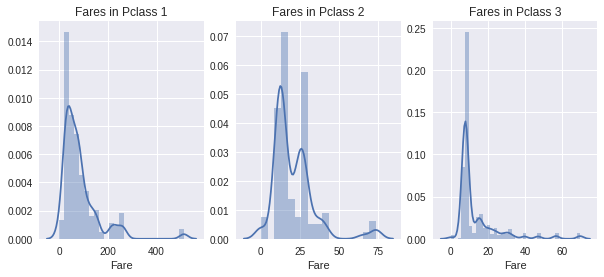

In [19]:
# fare correlated to survival rate
f,ax=plt.subplots(1,3,figsize=(10,4));
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0]);
ax[0].set_title('Fares in Pclass 1');
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1]);
ax[1].set_title('Fares in Pclass 2');
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2]);
ax[2].set_title('Fares in Pclass 3');
plt.show();

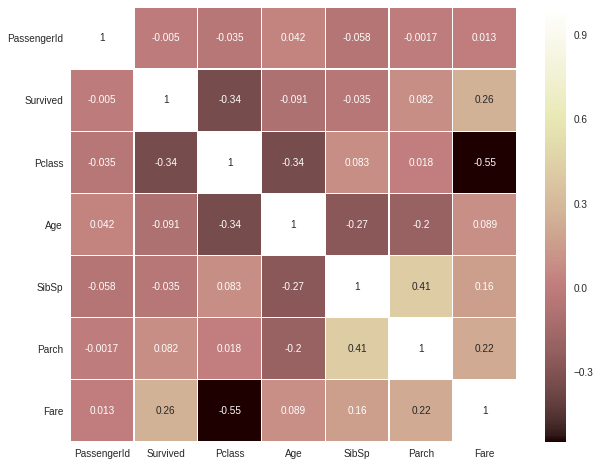

In [20]:
sns.heatmap(train.corr(),annot=True,cmap='pink',linewidths=0.2);
fig=plt.gcf();
fig.set_size_inches(10,8);
plt.show();